In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

In [35]:

# Set up a radial grid
r_min, r_max, N = 0.1, 10.0, 1001  # Avoid singularity at r=0
r = np.linspace(-r_max, r_max, N)
dr = abs(r[1] - r[0])


In [45]:
# Define potentials
def all_electron_potential(r):
    """Coulomb potential for a hydrogen-like atom."""
    return -1 / abs(r)

In [37]:
def pseudopotential(r, rc=0.5):
    """Smooth pseudopotential avoiding singularity at r=0."""
    V_ps = np.where(abs(r) < rc, -1 / rc * (3 - (r/rc)**2), -1 / abs(r))
    return V_ps

C:\Users\jones\AppData\Local\Temp\ipykernel_52040\4214154108.py:3: RuntimeWarning: divide by zero encountered in divide
  V_ps = np.where(abs(r) < rc, -1 / rc * (3 - (r/rc)**2), -1 / abs(r))


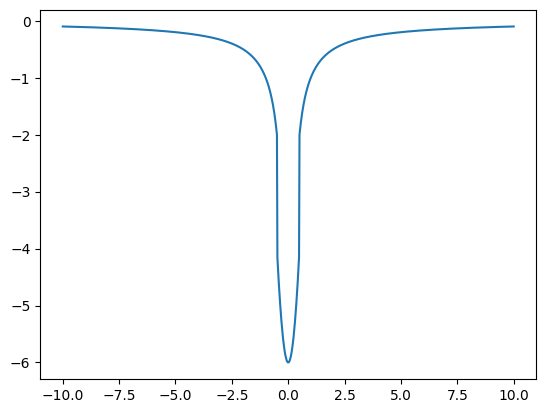

In [38]:
plt.plot(r, pseudopotential(r))

In [46]:
# Discretize the Laplacian using finite differences
diagonal = -2.0 * np.ones(N) / dr**2
off_diagonal = np.ones(N-1) / dr**2
Laplacian = diags([diagonal, off_diagonal, off_diagonal], [0, -1, 1])

In [47]:
# Construct Hamiltonians
H_all = -0.5 * Laplacian + diags(all_electron_potential(r))  # All-electron
H_ps = -0.5 * Laplacian + diags(pseudopotential(r))  # Pseudopotential

C:\Users\jones\AppData\Local\Temp\ipykernel_52040\339608167.py:4: RuntimeWarning: divide by zero encountered in divide
  return -1 / abs(r)
C:\Users\jones\AppData\Local\Temp\ipykernel_52040\4214154108.py:3: RuntimeWarning: divide by zero encountered in divide
  V_ps = np.where(abs(r) < rc, -1 / rc * (3 - (r/rc)**2), -1 / abs(r))


In [48]:
# Solve for lowest eigenvalues (bound states)
num_states = 3
E_all, psi_all = eigsh(H_all, k=num_states, which='SA')
E_ps, psi_ps = eigsh(H_ps, k=num_states, which='SA')


In [42]:
np.trapz(psi_all[:,0]**2, r)
np.trapz(psi_ps[:,0]**2, r)


0.020000000000000198

In [43]:
# Normalize wavefunctions
psi_all /= np.sqrt(np.trapz(psi_all**2,))
psi_ps /= np.sqrt(np.trapz(psi_ps**2,))

ValueError: operands could not be broadcast together with shapes (1001,3) (1001,) (1001,3) 

C:\Users\jones\AppData\Local\Temp\ipykernel_52040\339608167.py:4: RuntimeWarning: divide by zero encountered in divide
  return -1 / abs(r)
C:\Users\jones\AppData\Local\Temp\ipykernel_52040\4214154108.py:3: RuntimeWarning: divide by zero encountered in divide
  V_ps = np.where(abs(r) < rc, -1 / rc * (3 - (r/rc)**2), -1 / abs(r))


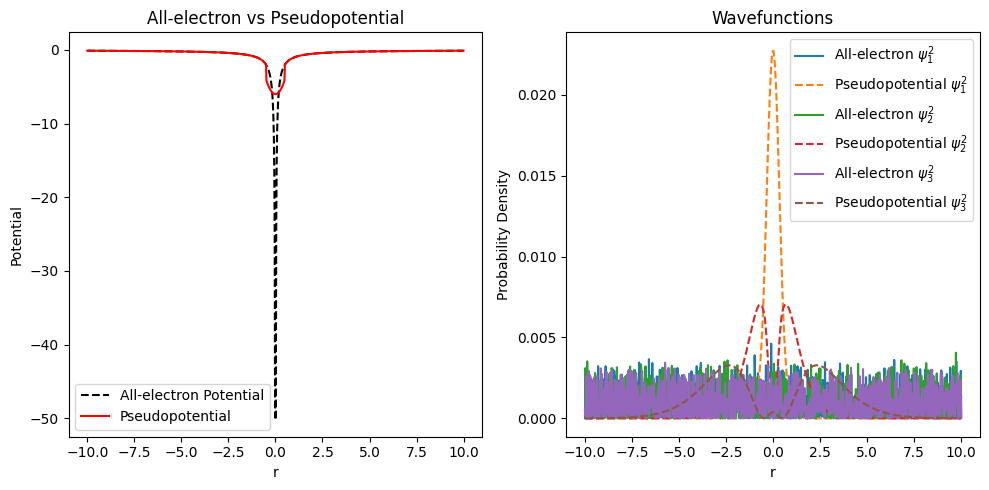

Energy Levels (All-electron): [nan nan nan]
Energy Levels (Pseudopotential): [-3.88979116 -0.67860596 -0.24963106]


In [49]:
# Plot results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(r, all_electron_potential(r), 'k--', label="All-electron Potential")
plt.plot(r, pseudopotential(r), 'r-', label="Pseudopotential")
plt.xlabel("r")
plt.ylabel("Potential")
plt.legend()
plt.title("All-electron vs Pseudopotential")

plt.subplot(1, 2, 2)
for i in range(num_states):
    plt.plot(r, psi_all[:, i]**2, label=f"All-electron $\psi_{i+1}^2$")
    plt.plot(r, psi_ps[:, i]**2, '--', label=f"Pseudopotential $\psi_{i+1}^2$")
plt.xlabel("r")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Wavefunctions")

plt.tight_layout()
plt.show()

# Print energy levels
print("Energy Levels (All-electron):", E_all)
print("Energy Levels (Pseudopotential):", E_ps)
